In [16]:
#In this example, a boosted decision tree is used for binary classification. I perform
#cross validation, and include confusion matrix, ROC and PR curves, as well as metrics 
#such as recall, accuracy, specificity and mathew's correlation coefficient to evaluate
#the classifier's performance.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns
import math

#Import DecisionTree as a classifier
from sklearn.ensemble import GradientBoostingClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

In [17]:
path = ''
file = 'heart.csv'

df = pd.read_csv(path + file)
df = df.dropna()
df.head()
print(df.keys())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [18]:
#dependent variable that will be predicted
var = 'target'

X = df.drop([var], axis=1)
X = pd.get_dummies(X) 

# Select the dependent variable
y = df[var] 

# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(1025, 13)
(1025,)


In [19]:
#initialize the boosted decision tree, with 100 estimators, a learning rate of 0.1
#and I also verify what is the default maximum depth for each tree

boosted_tree = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

print("Created Boosted Decision Tree Classifier")

# Access the default max_depth value
default_max_depth = boosted_tree.get_params()['max_depth']

print("Default max_depth:", default_max_depth)

Created Boosted Decision Tree Classifier
Default max_depth: 3


In [20]:
# Perform cross-validation with 10 folds
# 'cv' parameter specifies the number of folds
# 'scoring' parameter specifies the evaluation metric (e.g., 'accuracy')

cross_val_scores = cross_val_score(boosted_tree, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:")
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_score = cross_val_scores.mean()
print(f"\nAverage Score: {average_score:.2f}")

Cross-Validation Scores:
Fold 1: 0.98
Fold 2: 0.99
Fold 3: 0.98
Fold 4: 0.96
Fold 5: 0.93
Fold 6: 0.99
Fold 7: 0.96
Fold 8: 0.99
Fold 9: 0.97
Fold 10: 0.95

Average Score: 0.97


In [21]:
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#training the classifier using X_Train and y_train 
boosted_tree.fit(X_train,y_train)

#Testing the model using X_test and storing the output in y_pred
y_pred = boosted_tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.99024


In [22]:
#calculate recall, precision and F1 score

rec = recall_score(y_test, y_pred, average='weighted')
pres = precision_score(y_test, y_pred, average='weighted')

F1_score = 2/((1/rec) + (1/pres))

print("The weighted recall is: ", rec)
print("The weighted precision is: ", pres)
print("The weighted F1-score is: ", F1_score)

The weighted recall is:  0.9902439024390244
The weighted precision is:  0.990422913403446
The weighted F1-score is:  0.9903333998318068


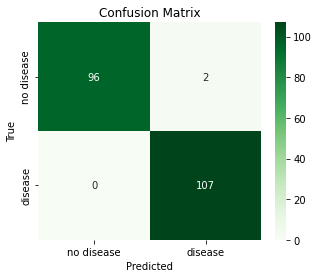

In [28]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ['no disease', 'disease']

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d') #I added the format parameter so that the
                                                    #cm shows values in integer format

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [24]:
# Get the feature importances
importance = boosted_tree.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Sum all the importance values
total_importance = feature_importances_df.sum()
print("")
print(f"Total Importance: {total_importance['Importance']}")

     Feature  Importance
2         cp    0.257162
11        ca    0.158787
9    oldpeak    0.111369
12      thal    0.107631
0        age    0.085787
7    thalach    0.060929
4       chol    0.060384
1        sex    0.051679
10     slope    0.037041
3   trestbps    0.032445
8      exang    0.022789
6    restecg    0.011885
5        fbs    0.002112

Total Importance: 1.0000000000000002


In [25]:
#metrics by hand

tp, fn, fp, tn = cm.ravel()

err = (fp + fn)/(fp + fn + tn + tp)
acc = (tp + tn)/(fp + fn + tn + tp)
re = tp/(tp + fn)
sp = tn/(tn + fp)
prec = tp/(tp + fp)
fpr = fp/(tn + fp)
mcc = ((tp*tn) - (fp*fn))/math.sqrt((tp + fp)*(tp + tn)*(tn + fp)*(tn + fn))
nmcc = (mcc + 1)/2
F1 = 2/((1/re) + (1/prec))

print("True Positive:", tp)
print("False Negative:", fn)
print("False Positive:", fp)
print("True Negative:", tn)
print("\nError rate:", err)
print("Accuracy:", acc)
print("True positive rate:", re) #sensitivity, recall
print("Specificity:", sp) #true negative rate
print("Precision:", prec) #positive predictive value
print("False positive rate:", fpr)
print("Mathews correlation coefficient:", mcc) #depends on al 4 cm values, ranges from +1 to -1, 0 is random
print("Normalized Mathews correlation coefficient:", nmcc) #depends on al 4 cm values,ranges from 0 to 1, 1/2 is random
print("F1 score:", F1)

True Positive: 96
False Negative: 2
False Positive: 0
True Negative: 107

Error rate: 0.00975609756097561
Accuracy: 0.9902439024390244
True positive rate: 0.9795918367346939
Specificity: 1.0
Precision: 1.0
False positive rate: 0.0
Mathews correlation coefficient: 0.6813436887630212
Normalized Mathews correlation coefficient: 0.8406718443815107
F1 score: 0.9896907216494847


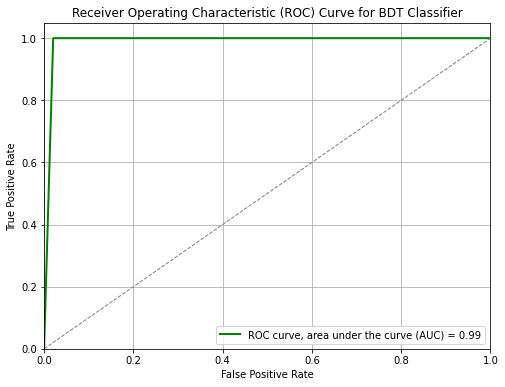

In [26]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='g', lw=2, label='ROC curve, area under the curve (AUC) = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate (Positive label: multiple recoil)')
#plt.ylabel('True Positive Rate (Positive label: multiple recoil)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for BDT Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

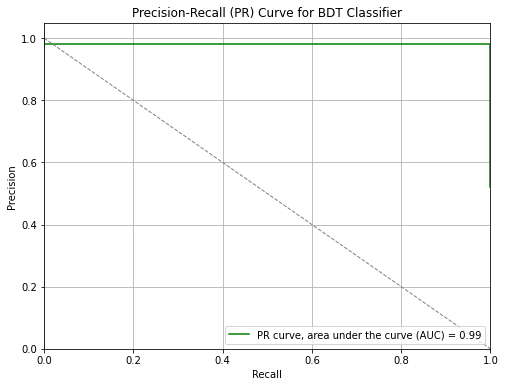

In [27]:
# Do a Precision-Recall curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate the AUC for the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='g', where='post', label='PR curve, area under the curve (AUC) = {:.2f}'.format(pr_auc))
#plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.plot([0, 1], [1, 0], color='gray', lw=1, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall (PR) Curve for BDT Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [30]:
#Here I implement a way of calculating the uncertainty in the predictions
#made by the BDT, using the staged probabilities for each iteration to 
#calculate a standard deviation for each probability, and then using
#that to calculate upper and lower values for the prediction of 
#1s (positive results for heart disease) and 0s (negative results)

#lower: the minimum amount of 1s, upper: the maximum amount of 1s. 
#for lower: subtract uncertainty from column of 1s and add to columns of 0s,
#for upper: subtract uncertainty from column of 0s and add to column of 1s
#then do argmax for each to obtain upper and lower predictions

staged_probs = boosted_tree.staged_predict_proba(X_test)

# Calculate the uncertainty as the standard deviation of the staged probabilities
uncertainty = np.std(list(staged_probs), axis=0)

pred_prob = boosted_tree.predict_proba(X_test)
print(pred_prob.shape)

pred_prob_lower = np.empty_like(pred_prob)
pred_prob_upper = np.empty_like(pred_prob)

# lower limit on predictions of 1s
for i in range(pred_prob.shape[0]):
    # Add uncertainty to the column of 0s 
    pred_prob_lower[i, 0] = pred_prob[i, 0] + uncertainty[i][1]
    
    # Subtract uncertainty from the column of 1s 
    pred_prob_lower[i, 1] = pred_prob[i, 1] - uncertainty[i][1]

#upper limit on prediction of 1s    
for i in range(pred_prob.shape[0]):
    # Subtract uncertainty from the column of 0s 
    pred_prob_upper[i, 0] = pred_prob[i, 0] - uncertainty[i][1]
    
    # Add uncertainty to the column of 1s 
    pred_prob_upper[i, 1] = pred_prob[i, 1] + uncertainty[i][1]    

# Get the final predictions by considering the class with the highest probability
y_pred = np.argmax(pred_prob, axis=1)
y_pred_lower = np.argmax(pred_prob_lower, axis=1)
y_pred_upper = np.argmax(pred_prob_upper, axis=1)
    
count = np.count_nonzero(y_pred == 1)
count_lower = np.count_nonzero(y_pred_lower == 1)
count_upper = np.count_nonzero(y_pred_upper == 1)

countz = np.count_nonzero(y_pred == 0)
count_lowerz = np.count_nonzero(y_pred_lower == 0)
count_upperz = np.count_nonzero(y_pred_upper == 0)

print("Number of predictions of 1s:", count, )
print("Lower limit on predictions of 1s:", count_lower)
print("Upper limit on predictions of 1s:", count_upper)

#inverted order for prediction of 0s
print("Number of predictions of 0s:", countz)
print("Lower limit on predictions of 0s:", count_upperz)
print("Upper limit on predictions of 0s:", count_lowerz)
    
print("Total predictions:", count + countz)
print("Total predictions (lower):", count_lower + count_lowerz)
print("Total predictions (upper):", count_upper + count_upperz) 

# Make predictions on the test set
y_pred_conf = boosted_tree.predict(X_test)

#confirmation that both methods of prediction give the same result
are_equal = np.array_equal(y_pred, y_pred_conf)
print('Are both methods of prediction equal?',are_equal)

(205, 2)
Number of predictions of 1s: 109
Lower limit on predictions of 1s: 109
Upper limit on predictions of 1s: 114
Number of predictions of 0s: 96
Lower limit on predictions of 0s: 91
Upper limit on predictions of 0s: 96
Total predictions: 205
Total predictions (lower): 205
Total predictions (upper): 205
Are both methods of prediction equal? True
